<a href="https://colab.research.google.com/github/DR2023/pythonforAI/blob/main/AIFab50_Pandas_Assignment_1_8_27_DR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import the pandas libraries
import pandas as pd

Read the data

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/nunnarilabs/ml/master/Loan_Payment_Dataset/loans.csv')
data

,id,account_id,date,amount,duration,payments,status
0,4959,2,1994-01-05,80952,24,3373,A
1,4961,19,1996-04-29,30276,12,2523,B
2,4962,25,1997-12-08,30276,12,2523,A
3,4967,37,1998-10-14,318480,60,5308,D
4,4968,38,1998-04-19,110736,48,2307,C
...,...,...,...,...,...,...,...
677,7294,11327,1998-09-27,39168,24,1632,C
678,7295,11328,1998-07-18,280440,60,4674,C
679,7304,11349,1995-10-29,419880,60,6998,C
680,7305,11359,1996-08-06,54024,12,4502,A


**Description**:
The "Financial Transactions" dataset contains information about various financial transactions conducted by different account holders. The dataset consists of 682 rows and 7 columns, each representing different attributes related to the transactions. The data spans over a period from 1994 to 1998.

1)id: A unique identifier for each transaction.

2)account_id: The ID associated with the account involved in the transaction.

3)date: The date when the transaction took place.

4)amount: The monetary amount of the transaction.

5)duration: The duration of the transaction in months.

6)payments: The number of payments made for the transaction.

7)status: The status code indicating the state of the transaction in terms of payment basis.

      -"A": Transaction is active and payments are up-to-date.
      
      -"B": Transaction is active with a minor delay in payments.
      
      -"C": Transaction is active, but there is a notable delay in payments.

## 1.)After Reading the dataset

In [4]:
# a) Print the first 10 rows
data[:10]


,id,account_id,date,amount,duration,payments,status
0,4959,2,1994-01-05,80952,24,3373,A
1,4961,19,1996-04-29,30276,12,2523,B
2,4962,25,1997-12-08,30276,12,2523,A
3,4967,37,1998-10-14,318480,60,5308,D
4,4968,38,1998-04-19,110736,48,2307,C
5,4973,67,1996-05-02,165960,24,6915,A
6,4986,97,1997-08-10,102876,12,8573,A
7,4988,103,1997-12-06,265320,36,7370,D
8,4989,105,1998-12-05,352704,48,7348,C
9,4990,110,1997-09-08,162576,36,4516,C


In [13]:
# b) Gain Information about the data
data.shape #roww,columns
data.index #index start, end and step
data.columns #lists column names
data.count #non-NA values count
data.info #info on dataframe



<bound method DataFrame.info of        id  account_id        date  amount  duration  payments status
0    4959           2  1994-01-05   80952        24      3373      A
1    4961          19  1996-04-29   30276        12      2523      B
2    4962          25  1997-12-08   30276        12      2523      A
3    4967          37  1998-10-14  318480        60      5308      D
4    4968          38  1998-04-19  110736        48      2307      C
..    ...         ...         ...     ...       ...       ...    ...
677  7294       11327  1998-09-27   39168        24      1632      C
678  7295       11328  1998-07-18  280440        60      4674      C
679  7304       11349  1995-10-29  419880        60      6998      C
680  7305       11359  1996-08-06   54024        12      4502      A
681  7308       11362  1996-12-27  129408        24      5392      A

[682 rows x 7 columns]>

In [14]:
# c) Describe the data for better Understanding
data.describe()


,id,account_id,amount,duration,payments
count,682.000000,682.000000,682.000000,682.000000,682.000000
mean,6172.466276,5824.162757,151410.175953,36.492669,4190.664223
std,682.579279,3283.512681,113372.406310,17.075219,2215.830344
min,4959.000000,2.000000,4980.000000,12.000000,304.000000
25%,5577.500000,2967.000000,66732.000000,24.000000,2477.000000
50%,6176.500000,5738.500000,116928.000000,36.000000,3934.000000
75%,6752.500000,8686.000000,210654.000000,48.000000,5813.500000
max,7308.000000,11362.000000,590820.000000,60.000000,9910.000000


#Let us go the story

1) I am a data analyst at a Bank who has the loan payment data and I need to know about the person who is regularly paying(status) over the long period of Time(Duration)

In [22]:
#Hint:I want the id who has higest status with more duration.
#Step 1: Filter rows with the highest status.
df = pd.DataFrame(data)
highest_status = df[df['status']== 'A']
#print(highest_status)

       id  account_id        date  amount  duration  payments status
0    4959           2  1994-01-05   80952        24      3373      A
2    4962          25  1997-12-08   30276        12      2523      A
5    4973          67  1996-05-02  165960        24      6915      A
6    4986          97  1997-08-10  102876        12      8573      A
10   4996         132  1996-11-06   88440        12      7370      A
..    ...         ...         ...     ...       ...       ...    ...
670  7264       11141  1997-10-07   44940        12      3745      A
672  7277       11231  1997-10-24   89280        12      7440      A
674  7284       11265  1993-09-15   52788        12      4399      A
680  7305       11359  1996-08-06   54024        12      4502      A
681  7308       11362  1996-12-27  129408        24      5392      A

[203 rows x 7 columns]


In [26]:
#step 2: Find the row with the longest duration among the highest status rows

highest_status_longest_duration = highest_status[highest_status['duration'] == highest_status['duration'].max()]
print(highest_status_longest_duration)

       id  account_id        date  amount  duration  payments status
540  6863        9188  1993-07-28  127080        60      2118      A
614  7104       10320  1993-12-13  259740        60      4329      A
658  7240       11013  1993-09-06  274740        60      4579      A


In [30]:
#step 3: Get the id of the row with the highest status and longest duration
id_with_highest_status_longest_duration = highest_status_longest_duration['id'].values
print("ID with Highest Status and Longest Duration:", id_with_highest_status_longest_duration)

ID with Highest Status and Longest Duration: [6863 7104 7240]


2) Now I want to know about the payments of the above person

In [39]:
#I want the payments of the ID who has highest_status in longest_duration
#Step 1: Find the entry with the highest status and longest duration
max_status_entry = highest_status[highest_status['duration'] == highest_status['duration'].max()]

#Step 2: Retrieve the account_id for the selected entry
account_id_highest_status_longest_duration = highest_status_longest_duration['id'].values[0]

#Step 3: Find the person's payments based on their account_id
person_payments = highest_status_longest_duration[highest_status_longest_duration['id'] == account_id_highest_status_longest_duration]

print(person_payments['payments'])

540    2118
Name: payments, dtype: int64


3) It is my responsibility to check the  people who are irregular in paying the money

In [41]:
##(Hint) find the id's who has low status

low_status_ids = df[df['status']== 'C']
print(low_status_ids)

       id  account_id        date  amount  duration  payments status
4    4968          38  1998-04-19  110736        48      2307      C
8    4989         105  1998-12-05  352704        48      7348      C
9    4990         110  1997-09-08  162576        36      4516      C
13   5015         226  1998-07-12  109344        12      9112      C
14   5027         276  1998-12-02  160920        36      4470      C
..    ...         ...         ...     ...       ...       ...    ...
675  7286       11271  1997-01-31   67320        36      1870      C
676  7292       11317  1998-11-22  317460        60      5291      C
677  7294       11327  1998-09-27   39168        24      1632      C
678  7295       11328  1998-07-18  280440        60      4674      C
679  7304       11349  1995-10-29  419880        60      6998      C

[403 rows x 7 columns]


4) I can't maintain everyone I want to see the people who is not paying the money often and duration given to him

In [43]:
#Step 1: Calculate the average payments for each account_id
average_payments = df.groupby('account_id')['payments'].mean()
print(average_payments)

account_id
2        3373.0
19       2523.0
25       2523.0
37       5308.0
38       2307.0
          ...  
11327    1632.0
11328    4674.0
11349    6998.0
11359    4502.0
11362    5392.0
Name: payments, Length: 682, dtype: float64


In [45]:
#Step 2: Filter the accounts with average payments below a certain threshold
threshold = 1000  # You can adjust this threshold(money considering point) as needed
accounts_below_threshold = average_payments[average_payments < threshold]
print(accounts_below_threshold)

account_id
938      371.0
1244     748.0
1766     501.0
2134     637.0
2268     561.0
2352     824.0
2824     841.0
3354     415.0
4099     872.0
4476     633.0
5033     950.0
5126     424.0
5164     621.0
5541     680.0
6040     489.0
6061     429.0
6097     728.0
6453     304.0
6688     638.0
7819     434.0
7861     607.0
8092     935.0
8268     359.0
8330     319.0
8475     878.0
8776     708.0
8972     938.0
9140     334.0
9548     962.0
9677     527.0
10001    529.0
10364    609.0
10711    403.0
10799    519.0
10954    312.0
Name: payments, dtype: float64


In [47]:
#Step 3 Get the corresponding records from the original DataFrame
result = df.merge(accounts_below_threshold, on='account_id', how='inner')

print("Accounts with Below-Threshold Payments:")
print(result)

Accounts with Below-Threshold Payments:
      id  account_id        date  amount  duration  payments_x status  \
0   5147         938  1998-05-21   22260        60         371      C   
1   5207        1244  1997-02-28   35904        48         748      C   
2   5311        1766  1996-06-15   30060        60         501      C   
3   5382        2134  1997-03-17   22932        36         637      C   
4   5429        2268  1996-07-18   20196        36         561      C   
5   5452        2352  1996-04-29   49440        60         824      C   
6   5549        2824  1994-07-16   50460        60         841      C   
7   5657        3354  1994-07-05    4980        12         415      A   
8   5808        4099  1997-07-31   41856        48         872      C   
9   5897        4476  1996-09-25   15192        24         633      A   
10  6019        5033  1996-07-25   11400        12         950      A   
11  6043        5126  1996-01-11   20352        48         424      C   
12  6052   

5) My View is more on the people with less time to pay

In [57]:
df_sorted_by_duration =result.sort_values(by='duration', ascending=True) # this will sory by duration but not req to get the records with shortest duration
# Filter the DataFrame to show records with the shortest durations
shortest_durations = result['duration'].min()
result[result['duration'] == shortest_durations]


,id,account_id,date,amount,duration,payments_x,status,payments_y
7,5657,3354,1994-07-05,4980,12,415,A,415.0
10,6019,5033,1996-07-25,11400,12,950,A,950.0
15,6234,6061,1998-05-28,5148,12,429,C,429.0


Hurray!!! found the people

6)Now We can find from which year people started buying loan

### Note:
If the date is not in datetime format kindly convert using the below code

```
df['date'] = pd.to_datetime(df['date'])
```



In [60]:
#Step 1: Convert the 'date' column to datetime
print(data['date'])
data['date'] = pd.to_datetime(data['date'])
print(data['date'])

0     1994-01-05
1     1996-04-29
2     1997-12-08
3     1998-10-14
4     1998-04-19
         ...    
677   1998-09-27
678   1998-07-18
679   1995-10-29
680   1996-08-06
681   1996-12-27
Name: date, Length: 682, dtype: datetime64[ns]
0     1994-01-05
1     1996-04-29
2     1997-12-08
3     1998-10-14
4     1998-04-19
         ...    
677   1998-09-27
678   1998-07-18
679   1995-10-29
680   1996-08-06
681   1996-12-27
Name: date, Length: 682, dtype: datetime64[ns]


In [62]:
#Step 2: Create a column year which contains the year of every data
data['Year'] = df['date'].dt.year
print(data)



       id  account_id       date  amount  duration  payments status  Year
0    4959           2 1994-01-05   80952        24      3373      A  1994
1    4961          19 1996-04-29   30276        12      2523      B  1996
2    4962          25 1997-12-08   30276        12      2523      A  1997
3    4967          37 1998-10-14  318480        60      5308      D  1998
4    4968          38 1998-04-19  110736        48      2307      C  1998
..    ...         ...        ...     ...       ...       ...    ...   ...
677  7294       11327 1998-09-27   39168        24      1632      C  1998
678  7295       11328 1998-07-18  280440        60      4674      C  1998
679  7304       11349 1995-10-29  419880        60      6998      C  1995
680  7305       11359 1996-08-06   54024        12      4502      A  1996
681  7308       11362 1996-12-27  129408        24      5392      A  1996

[682 rows x 8 columns]


In [63]:
#Step 3: Find the minimum year from the 'date' column
start_year = data['Year'].min()

print("Year when people started buying loans:", start_year)

Year when people started buying loans: 1993


7) Visualization the data is more important.I want to show Total Transaction Amounts Over Years to my manager



   Year    amount
0  1993   2619276
1  1994  13379904
2  1995  13344372
3  1996  18317676
4  1997  30731364
5  1998  24869148


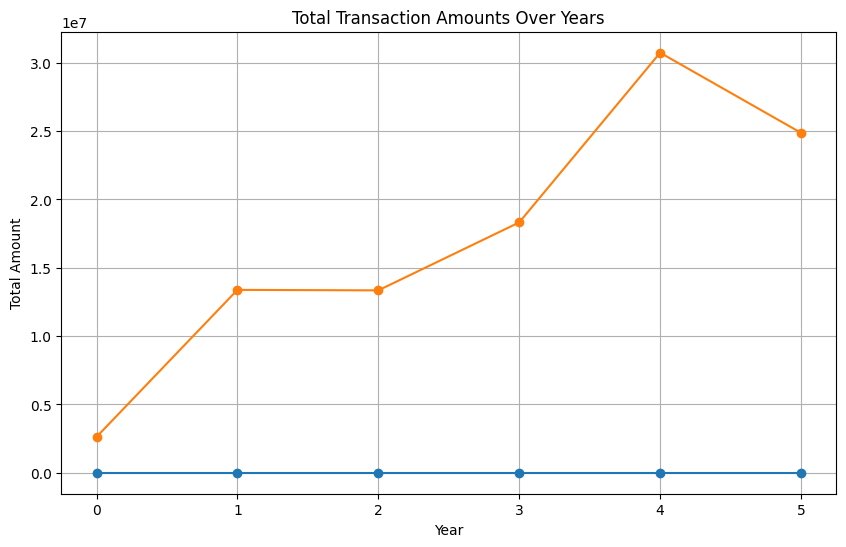

In [72]:
#Import the matplot library
import matplotlib.pyplot as plt
# Group the data by Year and calculate total transaction amount for each year
yearly_amounts = data.groupby('Year')['amount'].sum().reset_index()
print(yearly_amounts)
# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_amounts.index, yearly_amounts.values, marker='o')
plt.title('Total Transaction Amounts Over Years')
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()